# 1. Data Collection and preparation

## 1.1 Data import and cleaning

### 1.1.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import difflib

### 1.1.2 Import data

In [2]:
input_path = 'input/'

In [3]:
trip_data = pd.read_csv(input_path+'boston_2018.csv',sep=',')

In [4]:
weather_data = pd.read_csv(input_path+'weather_hourly_boston.csv', sep = ',')

In [5]:
station_data = pd.read_csv(input_path+'A&A Station Info.csv', sep = ',')

### 1.1.3 Set output path

In [6]:
output_path = 'data/'

### 1.2 Bike trips data

In [7]:
trip_data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46.7060,2018-12-31 23:56:55.6290,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber
1767802,2018-12-31 23:48:58.9710,2019-01-01 03:13:49.5120,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber
1767803,2018-12-31 23:51:19.8590,2019-01-01 00:17:15.7410,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber
1767804,2018-12-31 23:54:16.7530,2018-12-31 23:57:17.9650,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer


#### 1.2.1 Overview of the data

In [8]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767806 entries, 0 to 1767805
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 107.9+ MB


In [9]:
print('Start times range from %s to %s' % (trip_data['start_time'].min(), trip_data['start_time'].max()))
print('End times range from %s to %s' % (trip_data['end_time'].min(), trip_data['end_time'].max()))

Start times range from 2018-01-01 00:16:33 to 2018-12-31 23:54:38.8850
End times range from 2018-01-01 00:23:01 to 2019-01-07 20:05:15.5850


In [10]:
station_ids = trip_data[['start_station_id','end_station_id']].values

print('Station IDs range from %s to %s' %(np.unique(station_ids).min(), np.unique(station_ids).max()))
print('Total # of station IDs: %s ' % (len(np.unique(station_ids))))

Station IDs range from 1 to 378
Total # of station IDs: 317 


In [11]:
trip_data.groupby('start_station_id').agg({'start_station_name':'unique'})

,start_station_name
start_station_id,
1,[18 Dorrance Warehouse]
3,[Colleges of the Fenway - Fenway at Avenue Lou...
4,[Tremont St at E Berkeley St]
5,[Northeastern University - North Parking Lot]
6,[Cambridge St at Joy St]
...,...
373,[Belgrade Ave at Walworth St]
374,[Tremont St at Hamilton Place]
376,[Honan Library]


In [12]:
# check if there are several station names assigned to one station_id
def check_id_names():
    """
    Method to check if multiple names are assigned to a single station id
    Input: None
    Returns: None
    """
    test = trip_data.groupby('start_station_id').agg({'start_station_name':'unique'})
    test['len']  = test['start_station_name'].str.len()
    dup = test.loc[(test['len']>1)]
    
    print(dup.iloc[:,0].values)

In [13]:
check_id_names()

[array(['Commonwealth Ave at Buick St', 'Commonwealth Ave at Agganis Way'],
       dtype=object)
 array(['Boylston St at Arlington St TEMPORARY WINTER LOCATION',
        'Boylston St at Arlington St'], dtype=object)
 array(['Yawkey Way at Boylston St.', 'Jersey St. at Boylston St.'],
       dtype=object)
 array(['Beacon St at Arlington St', 'Mugar Way at Beacon St'],
       dtype=object)
 array(['Charles Circle - Charles St at Cambridge St TEMPORARY WINTER LOCATION',
        'Charles Circle - Charles St at Cambridge St'], dtype=object)
 array(['Allston Green District - Griggs St at Commonwealth Ave TEMPORARY WINTER LOCATION',
        'Allston Green District - Griggs St at Commonwealth Ave'],
       dtype=object)
 array(['Coolidge Corner - Beacon St @ Centre St',
        'Coolidge Corner - Beacon St at Centre St'], dtype=object)
 array(['Boylston St at Washington St', 'Chinatown T Stop'], dtype=object)
 array(['Washington Square at Washington St. / Beacon St. TEMPORARY WINTER LOCATION',

There are station ids that are assigned to two, some even three, different names. Most of the cases seem to exist because station names end in the trip_data with "(former)" or "TEMPORARY WINTER LOCATION". Even though those suffixes might indicate that the stations were replaced by bigger/smaller ones, we assume that the location did not change if it is listed in the station database by Bluebikes by the same id. We theorize that for all other stations that are assigned the same id, the names were changed to more accurate/relevant names (e.g. the pairs "Boylston St at Washington St' and'Chinatown T Stop'). While this is not relevant yet, we will deal with this in 1.4.4, where we combine/merge the trip_data and station_data to enable further analyses.


In [14]:
bike_ids = trip_data[['bike_id']].values

print('Bike IDs range from %s to %s' %(np.unique(bike_ids).min(), np.unique(bike_ids).max()))
print('Total # of bike used in 2018: %s bikes' % (len(np.unique(bike_ids))))

Bike IDs range from 1 to 4553
Total # of bike used in 2018: 4045 bikes


In [15]:
print('User types are: %s' % (np.unique(trip_data[['user_type']].values)))

User types are: ['Customer' 'Subscriber']


#### 1.2.2 Formatting the data

In [16]:
# transform start_time and end_time to datetime
trip_data[['start_time','end_time']] = trip_data[['start_time','end_time']].apply(pd.to_datetime)

# start hour = absolute hour within the a day (0-23h)
trip_data['start_hour'] = pd.DatetimeIndex(trip_data['start_time']).hour

# weekday = day within a single week (values 0-6, where 0 = monday)
trip_data['weekday'] = pd.DatetimeIndex(trip_data['start_time']).weekday

# number of the month (1-12, where 1 = January)
trip_data['month'] = pd.DatetimeIndex(trip_data['start_time']).month

# duration of a trip in seconds
trip_data['duration'] = (trip_data['end_time'] - trip_data['start_time']).dt.total_seconds().astype(int)

# convert station_ids to string
trip_data[['start_station_id', 'end_station_id']] = trip_data[['start_station_id', 'end_station_id']].astype(str)

In [17]:
trip_data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,weekday,month,duration
0,2018-01-01 00:16:33.000,2018-01-01 00:23:01.000,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,0,0,1,388
1,2018-01-01 00:42:00.000,2018-01-01 00:46:25.000,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,0,0,1,265
2,2018-01-01 00:42:44.000,2018-01-01 01:02:11.000,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,0,0,1,1167
3,2018-01-01 00:56:50.000,2018-01-01 01:11:06.000,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,0,0,1,856
4,2018-01-01 01:07:54.000,2018-01-01 01:16:02.000,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,1,0,1,488
...,...,...,...,...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46.706,2018-12-31 23:56:55.629,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber,23,0,12,488
1767802,2018-12-31 23:48:58.971,2019-01-01 03:13:49.512,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber,23,0,12,12290
1767803,2018-12-31 23:51:19.859,2019-01-01 00:17:15.741,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber,23,0,12,1555
1767804,2018-12-31 23:54:16.753,2018-12-31 23:57:17.965,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer,23,0,12,181


#### 1.2.3 Cleaning the data

In [18]:
print('Analyzing the dataset \n---------------------')
print('Are there any NaN values - ',trip_data.isnull().values.any())
print('Are there any null values - ',trip_data.isnull().values.any())
print('Number of duplicate rows -', trip_data.duplicated().sum())
print('Number of bike trips below 60 seconds -',len(trip_data.loc[trip_data['duration']<60]))

Analyzing the dataset 
---------------------
Are there any NaN values -  False
Are there any null values -  False
Number of duplicate rows - 0
Number of bike trips below 60 seconds - 1


We do not need to handle missing data or eliminate duplicate entries in this case.

In [19]:
#delete rows where duration of bike trips is below 60 seconds
trip_data.drop(trip_data[trip_data['duration'] < 60].index, inplace=True)

Bluebikes cleaned the data from bike trips that fall below 60 seconds (due to "potentially false starts or users trying to re-dock a bike to ensure it was secure"). We therefore checked the data another time and removed entries below 60 seconds, as they should not be there and are most likely faulty data.

In [20]:
#show duration data in minutes
trip_data['duration'].describe().apply(lambda x: format(x/60, 'f'))

count     29463.416667
mean         26.641621
std         520.109471
min           1.016667
25%           6.866667
50%          11.600000
75%          19.650000
max      155475.966667
Name: duration, dtype: object

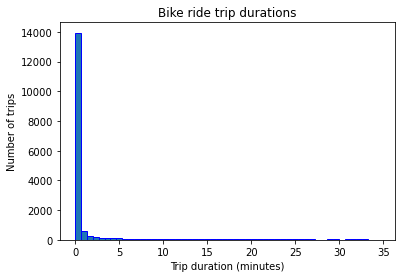

In [21]:
# showing histogram of duration
hist_data = trip_data['duration'].value_counts()/60
plt.hist(hist_data, bins="rice", edgecolor = 'blue')
plt.xlabel('Trip duration (minutes)')
plt.ylabel('Number of trips')
plt.title('Bike ride trip durations')
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

In [22]:
def find_outliers(df, bound=None):
    """
    Method that uses the IQR-method to find upper bounds for outliers.
    Parameters:
    df = input dataframe
    bound = optional parameter to only include trips that are above i (bound) minutes
    """
    df_slice = df.loc[(df['duration'] > 60*bound)].copy()
    q1, q3= np.percentile(df_slice['duration'],[25,75])
    iqr = q3 - q1
    #data is skewed; defining a lower bound is therefore not necessary
    upper_bound = q3 +(1.5 * iqr)
    upper_round = round(upper_bound/60,2)
    abs_exceed = len(df_slice.loc[(df_slice['duration']>upper_bound)])
    rel_exceed = round(abs_exceed*100/len(df),2)
    print("The upper bound is "+str(upper_round)+" minutes. All values above are considered outliers by the IQR-method.\n"
          +str(abs_exceed)+"("+str(rel_exceed)+"%)"" trips exceed this value.\n")
    return upper_bound

In [23]:
upper1 = find_outliers(trip_data, 0)

The upper bound is 38.83 minutes. All values above are considered outliers by the IQR-method.
122287(6.92%) trips exceed this value.



The IQR-method proposes an upperbound of 38.83 minutes, that defines that all trips with durations longer than that are considered outliers. However, we argue that the pricing modells of Bluebikes include trip durations of up to two hours. While those trips are not econimical, as it would be cheaper to secure the bike and rent it another time with a subscription, there might be cases where trips above two hours are reasonable. We therefore run the IQR-method another time, this time with a sliced dataset that only includes trips with durations exceeding two hours. We theorize with confidence that the trip durations exceeding the new upperbound resulted because of customers forgetting to secure the bikes after their trip or technical issues that prevented the bike from securing correctly, thus exceeding the rental without the customer knowing.

In [24]:
# describe the set of trips above two hours (in minutes)
trip_data.loc[(trip_data['duration'] > 60*120),'duration'].describe().apply(lambda x: format(x/60/60, 'f'))

count       4.251111
mean       20.925231
std        90.829946
min         2.000278
25%         2.324653
50%         2.991528
75%         6.200417
max      2591.266111
Name: duration, dtype: object

In [25]:
upper2 = find_outliers(trip_data, 120)

The upper bound is 720.84 minutes. All values above are considered outliers by the IQR-method.
2639(0.15%) trips exceed this value.



In [26]:
# filter data for trips that are below the upper bound (excluding outliers)
trip_data_clean = trip_data.loc[(trip_data['duration'] < upper2)].copy()

In [27]:
trip_data_clean.to_pickle(output_path+'trip_data.pkl')

### 1.3 Weather data

#### 1.3.1 Overview of the data

In [28]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [29]:
weather_data

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0
3,2015-01-02 04:00:00,-0.6,-0.6,0.0
4,2015-01-02 05:00:00,-0.6,-0.6,0.0
...,...,...,...,...
43843,2020-01-01 20:00:00,5.0,5.0,0.0
43844,2020-01-01 21:00:00,4.4,4.4,0.0
43845,2020-01-01 22:00:00,4.4,4.4,0.0
43846,2020-01-01 23:00:00,3.9,3.9,0.0


#### 1.3.2 Formatting the data

In [30]:
#set datatype
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

In [31]:
#create slice of df with values that are relevant for our data (2018)
weather_data_2018 = weather_data[(weather_data['date_time'] >= "2018-01-01") & (weather_data['date_time'] < "2019-01-01")].copy()

In [32]:
# sort the dataframe in acending order
weather_data_2018.sort_index(inplace=True)

#### 1.3.3 Cleaning the data

In [33]:
# check for null values and duplicates
print('The dataframe has %s  null values.' % (weather_data_2018.isnull().values.sum()))
print('The dataframe has %s duplicate rows.' % (weather_data_2018.duplicated().sum()))

The dataframe has 0  null values.
The dataframe has 149 duplicate rows.


In [34]:
# # drop duplicate rows
weather_data_2018.drop_duplicates(subset='date_time', keep='first', inplace=True)

In [35]:
def check_missing_values(df):
    # Checking if we have any gaps in our dataframe
    # Create expected date range
    date_range = pd.date_range(start=df['date_time'].min(), end=df['date_time'].max(), freq='H')
    
    # Check for missing dates
    missing_dates = date_range.difference(df['date_time'])

    if len(missing_dates) > 0:
        print("There are ",len(missing_dates)," gaps in date_time and "+ str(len(df[df['precip'].isna()])) +" nan values in the weather data.")
    else:
        print("There are no gaps in date_time and "+ str(len(df[df['precip'].isna()])) +" nan values in the weather data.")

In [36]:
def fill_missing_values(df):
    df['index'] = df['date_time']
    
    # set date_time as index
    df.set_index('index', inplace=True)

    # sort the dataframe in acending order
    df.sort_index(inplace=True)

    # add the missing rows with a specific frequency -> 'H' for hourly
    df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max(), freq='H'))

    # fill the missing values of min_temp; max_temp and precip with the average of the previous and next hour's values
    df = df.interpolate(method='linear')
    
    # set index to column
    df['date_time'] = df.index
    
    print(str(len(df.loc[(df['precip']>0)&(df['precip']<1)]))+" rows in the data are inbetween rainy/sunny hours")
    
    # set values for precip that are not binary to a random binary variable
    df.loc[(df['precip']>0)&(df['precip']<1), 'precip'] = np.random.choice([0,1])
    
    # reset the index as we do not need it anymore
    df.reset_index(drop=True, inplace=True)
    
    return df

In [37]:
check_missing_values(weather_data_2018)

There are  689  gaps in date_time and 0 nan values in the weather data.


In [38]:
weather_data_cleaned = fill_missing_values(weather_data_2018)

149 rows in the data are inbetween rainy/sunny hours


We filled the gaps for hourly weather data and precip via linear interpolation. We assume that it did (not) rain in between hours with (without) rain. 149 values were between hours where it did and did not rain. This creates values between [0,1] and is therefore not valid for further analyses. Because we cannot know when the rain started exactly, we set those values to a random binary variable. This creates some fuzziness in our data, however it is neglible because (a) the amount of such data is relatively low and (b) precip is only one feature in a set of features.

In [39]:
check_missing_values(weather_data_cleaned)

There are no gaps in date_time and 0 nan values in the weather data.


In [40]:
weather_data_cleaned.to_pickle(output_path+'weather_data.pkl')

### 1.4 Station data

#### 1.4.1 Overview of the data

In [41]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number              448 non-null    object 
 1   Name                448 non-null    object 
 2   Latitude            448 non-null    float64
 3   Longitude           448 non-null    float64
 4   District            444 non-null    object 
 5   Public              448 non-null    object 
 6   Total docks         448 non-null    int64  
 7   Deployment Year;;;  448 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.1+ KB


In [42]:
station_data

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year;;;
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021;;;
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021;;;
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014;;;
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018;;;
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020;;;
...,...,...,...,...,...,...,...,...
443,N32005,West Newton,42.349601,-71.226275,Newton,Yes,14,2020;;;
444,A32043,Western Ave at Richardson St,42.361787,-71.143931,Boston,Yes,0,2019;;;
445,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,2019;;;
446,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23,2018;;;


#### 1.4.2 Formatting the data

In [43]:
station_data.rename(columns = {'Number':'station_id', 
                                'Name':'station_name', 
                                'Latitude':'latitude', 
                                'Longitude': 'longitude', 
                                'District' : 'district', 
                                'Public':'is_public', 
                                'Total docks' : 'total_docks', 
                                'Deployment Year;;;': 'deployment_year'
                               }, inplace = True)

station_data['deployment_year'] = station_data['deployment_year'].str.rstrip(';;;')
station_data

,station_id,station_name,latitude,longitude,district,is_public,total_docks,deployment_year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020
...,...,...,...,...,...,...,...,...
443,N32005,West Newton,42.349601,-71.226275,Newton,Yes,14,2020
444,A32043,Western Ave at Richardson St,42.361787,-71.143931,Boston,Yes,0,2019
445,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,2019
446,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23,2018


#### 1.4.3 Cleaning the data

In [44]:
station_data.isnull().any()

station_id         False
station_name       False
latitude           False
longitude          False
district            True
is_public          False
total_docks        False
deployment_year    False
dtype: bool

#### 1.4.4 Saving station data

In [45]:
station_data.to_pickle(output_path+'station_data.pkl')

As the district-data is irrelevant for us, there is no need to handle missing values. The station data is ready for further use here and we will pickle the dataframe. In 1.4.4 we combine the station data (i.e. the geographical coordinates that are provided for each station) with the trip data to allow for further analyses. The result will be called "geo_data".

#### 1.4.5 Combining trip_data and station_data

To link the station data to the trip data, we need to harmonize the station_ids by their station names, as both data sets use different ids. We decide to change the station_ids of the "station_data".

In [46]:
#check if values of station_name in trip_data and station_data are identical

# create a list of the names of all stations in trip_data
ids_trip = []
ids_trip.extend(trip_data_clean['start_station_name'].unique())
ids_trip.extend(trip_data_clean['end_station_name'].unique())
list(set(ids_trip))

# create a list of the names of all stations in station_data
ids_station = []
ids_station.extend(station_data['station_name'].unique())
list(set(ids_station))

# compare, if there are any differences
diff = [x for x in ids_trip if x not in ids_station]
print(len(diff)," station names of trip_data do not match the station names from station_data.")
#print(diff)

190  station names of trip_data do not match the station names from station_data.


We see that not all the names of stations match in the datasets. We iteratively match the names. We assume that the location did not change even though a name was changed slightly if it is listed in the station database by Bluebikes.

In [47]:
#create a slice of the trip dataframe for further merging and drop duplicates
trip_stations = trip_data_clean[['start_station_id','start_station_name']].drop_duplicates()

We assume that station locations did not change for station ids, even if they are assigned to multiple names (see 1.2.1 for justification).

In [48]:
def merge_trip_station(trip_df, stend=None):
    """
    Method to create a dataframe of station_ids according to the trip_data-logic and 
    their according coordinates from station_data.
    Input: trip_station dataframe
    Output: Merged dataframe
    """
    df = pd.merge(trip_df, station_data[['station_name']], 
                    left_on='start_station_name', right_on='station_name', how='left')
    return df

In [49]:
geo_data = merge_trip_station(trip_stations)

In [50]:
#check how many stations did not match
print("%s stations miss geographical data." % geo_data.loc[geo_data.isna().any(axis=1),'start_station_name'].nunique())

94 stations miss geographical data.


In [51]:
#save list of station names that did not match to a list
no_match = geo_data.loc[geo_data.isna().any(axis=1),'start_station_name'].unique().tolist()

In [52]:
def find_station_match(missing_list, full_list):
    """
    Method to find the closest match of a station name in a list to the station name of another list.

    Returns a dict.
    """
    keys=[]
    vals=[]
    for i in range(0,len(missing_list)):
        keys.append(missing_list[i])
        match=difflib.get_close_matches(missing_list[i], full_list, n=1, cutoff=0.5)
        if len(match) > 0:
            vals.extend(match)
        else:
            vals.append(np.nan)
    matches = dict(zip(keys,vals))
    return matches

In [53]:
#find the closest matches of the station names
matches = find_station_match(no_match, ids_station)

#control the dict if the mapping was right - use a loop for formatting/easier readability
for k, v in matches.items():
    print ("'"+k+"',", '-->', v)

'Coolidge Corner - Beacon St @ Centre St', --> Coolidge Corner - Beacon St at Centre St
'Upham's Corner TEMPORARY WINTER LOCATION', --> nan
'Boylston St at Arlington St TEMPORARY WINTER LOCATION', --> Boylston St at Dartmouth St
'Charles Circle - Charles St at Cambridge St TEMPORARY WINTER LOCATION', --> Charles Circle - Charles St at Cambridge St
'Boylston St at Washington St', --> Bacon St at Washington St
'Brian P. Murphy Staircase at Child Street', --> Child Street at Brian P. Murphy Staircase
'Prudential Center - Belvedere St', --> Prudential Center - 101 Huntington Ave
'Inman Square at Vellucci Plaza / Hampshire St', --> Inman Square at Springfield St.
'Columbus Ave at Massachusetts Ave', --> Boylston St at Massachusetts Ave
'Sidney Research Campus/ Erie Street at Waverly', --> Sidney Research Campus/Erie Street at Waverly
'Brookline Village - Station Street @ MBTA TEMPORARY WINTER LOCATION', --> Brookline Village - Station Street at MBTA
'Beacon St at Arlington St', --> Bacon St

After manually checking for correctness we delete incorrect mappings. We assume that those stations do not exist anymore and we cannot reconstruct their coordinates.

In [54]:
matches['Uphams Corner TEMPORARY WINTER LOCATION']='Uphams Corner'

still_missing = ['Boylston St at Arlington St TEMPORARY WINTER LOCATION',
                'Boylston St at Washington St',
                'Columbus Ave at Massachusetts Ave',
                'Beacon St at Arlington St',
                'Commonwealth Ave at Buick St',
                'Washington Square at Washington St. / Beacon St. TEMPORARY WINTER LOCATION',
                'Allston Green District - Griggs St at Commonwealth Ave TEMPORARY WINTER LOCATION',
                'University of Massachusetts Boston - Integrated Sciences Complex',
                'Congress St at North St',
                'Dudley Square - Dudley St at Warren St',
                'Faneuil St at Market St',
                '18 Dorrance Warehouse',
                'Chelsea St at Saratoga St',
                'Allston Green District - Griggs St at Commonwealth Ave',
                'Boylston St at Arlington St',
                'Washington Square at Washington St. / Beacon St.',
                'Yawkey Way at Boylston St.',
                'Beacon St at Washington / Kirkland',
                'Charles St and Beacon St',
                'Post Office Square - Pearl St at Milk St',
                'Jersey St. at Boylston St.',
                'Child St at North St',
                '8D OPS 01',
                'Somerville Hospital',
                'Washington St at Myrtle St',
                'Washington St at Bradlee St',
                'Broadway T Stop',
                'Washington St at Myrtle St (former)',
                'Broadway T Stop (former)',
                'BCBS Quincy',
                'BCBS Hingham',
                'Boston Public Market']

for m in still_missing:
    del matches[m]

In [55]:
#map names
trip_stations_mapped = trip_stations.replace({'start_station_name':matches})
trip_stations_mapped.rename(columns={'start_station_id':'station_id','start_station_name':'station_name'},inplace=True)
trip_stations_mapped.drop_duplicates(subset='station_name', inplace=True)

In [56]:
def check_duplicates(df, col_name):
    """
    Method to check if there are multiple names assigned to one station id.
    Input:
    df
    col_name: str, name of the column that contains the station ids
    Returns
    None
    """
    # get the id's that occur more than once
    duplicate_ids = df[col_name].value_counts()[df[col_name].value_counts() > 1].index

    # filter the DataFrame to only show rows with duplicate ids
    df_duplicates = df[df[col_name].isin(duplicate_ids)].copy()
    df_duplicates.sort_values(by=col_name, inplace=True)

    # display the filtered DataFrame
    print(df_duplicates)

In [57]:
check_duplicates(trip_stations_mapped, 'station_id')

        station_id                                       station_name
1364467        120                            Beacon St at Charles St
181775         120                           Charles St and Beacon St
18             130                                                NaN
167316         130                                      Uphams Corner
175            193         Brookline Village - Station Street at MBTA
264972         193                                Brookline Town Hall
58             195          Child Street at Brian P. Murphy Staircase
265298         195                               Child St at North St
271633         219                        Boston East - 126 Border St
5411           219                         Central Square East Boston
893356         231                         Washington St at Myrtle St
1365245        231                Washington St at Myrtle St (former)
1343007        307                                    Broadway T Stop
1371229        307  

After replacing the station names, there are still double entries for some station ids. ´By merging on those double entries we extend our dataframe. This poses no problem: First, we map the station names of the trip data to the station data. All the station names of the trip data that still do not match any entries from the station data will not have correspending coordinates and therefore be dropped. This will reduce the number of trips that go into our station analysis by some degree, as we are lacking infos about some stations.

In [58]:
def merge_trip_data_names(df, stend):
    #replace station names of trip_data_clean by their id so they can be merged on station names from station_data
    trip_data_mapped = pd.merge(df, trip_stations_mapped, left_on=stend+'_station_id', right_on='station_id', how='left')
    trip_data_mapped[stend+'_station_name'] = trip_data_mapped['station_name']
    trip_data_mapped.drop(['station_name','station_id'], axis=1, inplace=True)
    return trip_data_mapped

In [59]:
# create new df with replaced names of start_stations
trip_data_mapped_start = merge_trip_data_names(trip_data_clean, 'start')
# also replace names of end_stations
trip_data_mapped_full = merge_trip_data_names(trip_data_mapped_start, 'end')

In [60]:
def get_trip_coords(trip_df, stend):
    """
    Method to create a dataframe of station_ids according to the trip_data-logic and 
    their according coordinates from station_data.
    Input: trip_station dataframe
            stend: string; 'start' or 'end' data to merge
    Output: Merged dataframe
    """
    #columns to keep from the left dataframe
    trip_df_cols = ['start_time','end_time','start_station_name', 'end_station_name']
    
    #if we add coordinates to the end station, keep columns w/ coordinates from the start station
    if stend == 'end':
        trip_df_cols  = trip_df_cols + ['start_lat', 'start_lon']
    
    #create strings for new start/end columns
    on_string = stend+'_station_name'
    lat_string = stend+'_lat'
    lon_string = stend+'_lon'
    
    #merge dataframes on station_names
    df = pd.merge(trip_df[trip_df_cols], station_data[['station_name','latitude','longitude']], 
                    left_on=on_string, right_on='station_name', how='left')
    
    #rename columns to identify start/end coords
    df.rename(columns={"latitude": lat_string,  "longitude": lon_string}, inplace=True)
    df.drop('station_name', axis=1, inplace=True)
    
    return df

In [61]:
#add start coordinates to fully mapped trip data
geo_data_start = get_trip_coords(trip_data_mapped_full, 'start')
#add end coordinates to fully mapped trip data
geo_data_full = get_trip_coords(geo_data_start, 'end')

In [62]:
geo_data_full

,start_time,end_time,start_station_name,end_station_name,start_lat,start_lon,end_lat,end_lon
0,2018-01-01 00:16:33.000,2018-01-01 00:23:01.000,MIT Pacific St at Purrington St,Ames St at Main St,42.359573,-71.101295,42.362500,-71.088220
1,2018-01-01 00:42:00.000,2018-01-01 00:46:25.000,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,42.379648,-71.095405,42.371197,-71.097599
2,2018-01-01 00:42:44.000,2018-01-01 01:02:11.000,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,42.348074,-71.076570,42.366426,-71.105495
3,2018-01-01 00:56:50.000,2018-01-01 01:11:06.000,Coolidge Corner - Beacon St at Centre St,University Park,42.341598,-71.123338,42.362648,-71.100061
4,2018-01-01 01:07:54.000,2018-01-01 01:16:02.000,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,42.345392,-71.069616,42.343666,-71.085824
...,...,...,...,...,...,...,...,...
1990121,2018-12-31 23:48:46.706,2018-12-31 23:56:55.629,Park Dr at Buswell St,MIT Vassar St,42.347241,-71.105301,42.355601,-71.103945
1990122,2018-12-31 23:48:58.971,2019-01-01 03:13:49.512,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,42.363871,-71.050877,42.363871,-71.050877
1990123,2018-12-31 23:51:19.859,2019-01-01 00:17:15.741,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,42.365070,-71.103100,42.365070,-71.103100
1990124,2018-12-31 23:54:16.753,2018-12-31 23:57:17.965,Ring Rd,Copley Square - Dartmouth St at Boylston St,42.348278,-71.080449,42.349928,-71.077392


In [63]:
#check how many rows of data will be left after removing trips that lack some information about coordinates
geo_data_full.dropna().shape[0]

1604519

In [64]:
#drop if there are still values missing
geo_data_clean = geo_data_full.dropna(how='any')

In [65]:
#check how many trips are missing
abs_missing = trip_data_clean.shape[0]-geo_data_full.dropna().shape[0]
rel_missing = round(abs_missing*100/trip_data_clean.shape[0],2)
print(abs_missing," trips are missing geographical data. That's ",rel_missing,"%")

160647  trips are missing geographical data. That's  9.1 %


While 9.1% of trips are missing for the geographical analysis, we expect that our data is still representative.

#### 1.4.6 Saving the data (geo_data)

In [66]:
geo_data_clean.to_pickle(output_path+'geo_data.pkl')